In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df=pd.read_csv(r"Downloads/DS1_C5_S2_EmployeeAttrition_Data_Practice.csv")
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 20:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  -----------------
Attrition                 Age
BusinessTravel            DistanceFromHome
Department                EmployeeNumber
EducationField            HourlyRate
EnvironmentSatisfaction   MonthlyIncome
Gender                    TotalWorkingYears
JobInvolvement            YearsAtCompany
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [6]:
cat_df=df.loc[:,categorical]
cat_df

,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,Sales,Life Sciences,2,Female,3,Sales Executive,4,Single,8,Y,Yes,3,1,0,1,4,0,5
1,No,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,Research Scientist,2,Married,1,Y,No,4,4,3,3,7,1,7
2,Yes,Travel_Rarely,Research & Development,Other,4,Male,2,Laboratory Technician,3,Single,6,Y,Yes,3,2,3,3,0,0,0
3,No,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,Research Scientist,3,Married,1,Y,Yes,3,3,3,3,7,3,0
4,No,Travel_Rarely,Research & Development,Medical,1,Male,3,Laboratory Technician,2,Married,9,Y,No,3,4,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,NaN,Research & Development,Medical,3,Male,4,Laboratory Technician,4,Married,4,Y,No,3,3,3,3,2,0,3
1466,No,Travel_Rarely,Research & Development,Medical,4,Male,2,Healthcare Representative,1,Married,4,Y,No,3,1,5,3,7,1,7
1467,No,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,Manufacturing Director,2,Married,1,Y,Yes,4,2,0,3,2,0,3
1468,No,Travel_Frequently,Sales,Medical,4,Male,2,Sales Executive,2,Married,2,Y,No,3,4,3,2,6,0,8


In [7]:
num_df=df.loc[:,continuous]
num_df

,Age,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,TotalWorkingYears,YearsAtCompany
0,41.0,1,1,94,5993,8,6
1,49.0,8,2,61,5130,10,10
2,37.0,2,4,92,2090,7,0
3,33.0,3,5,56,2909,8,8
4,27.0,2,7,40,3468,6,2
...,...,...,...,...,...,...,...
1465,36.0,23,2061,41,2571,17,5
1466,39.0,6,2062,42,9991,9,7
1467,27.0,4,2064,87,6142,6,6
1468,49.0,2,2065,63,5390,17,9


In [8]:
#TASK1
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='BusinessTravel', ylabel='count'>

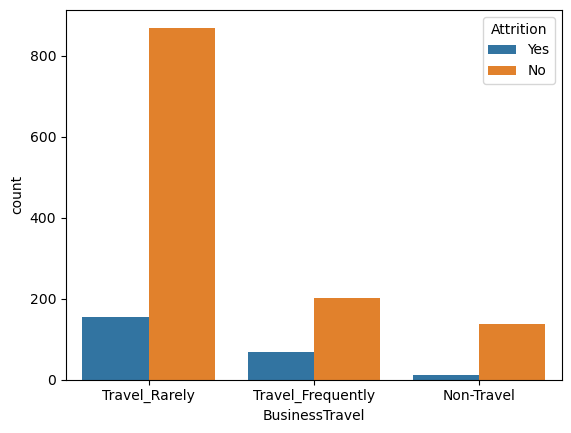

In [9]:
sb.countplot(x='BusinessTravel', hue='Attrition', data=cat_df)

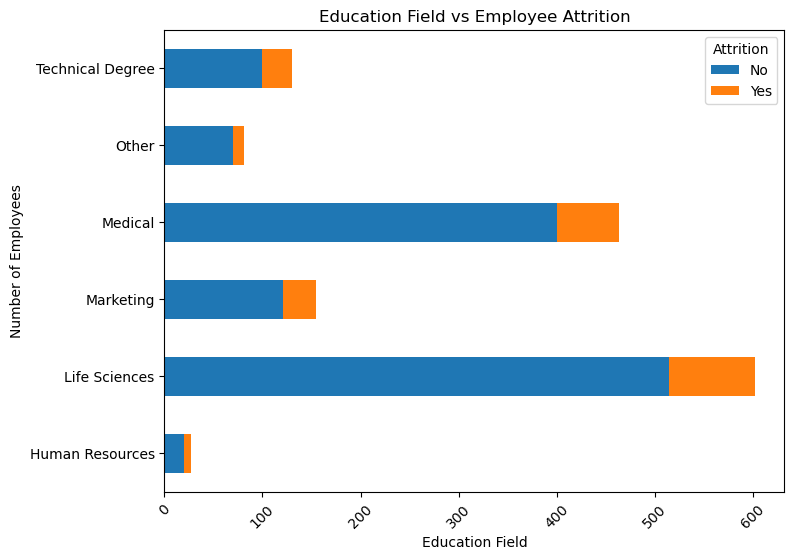

In [10]:
attrition_counts = pd.crosstab(cat_df['EducationField'], cat_df['Attrition'])
attrition_counts.plot(kind='barh', stacked=True, figsize=(8, 6))
plt.xlabel('Education Field')
plt.ylabel('Number of Employees')
plt.title('Education Field vs Employee Attrition')
plt.xticks(rotation=45)  
plt.show()


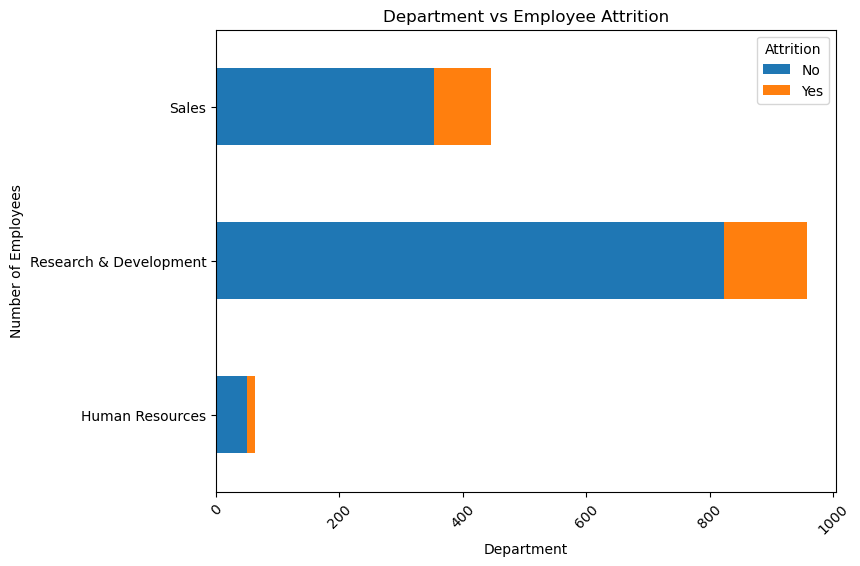

In [11]:
attrition_counts = pd.crosstab(cat_df['Department'], cat_df['Attrition'])
attrition_counts.plot(kind='barh', stacked=True, figsize=(8, 6))
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Department vs Employee Attrition')
plt.xticks(rotation=45)  
plt.show()


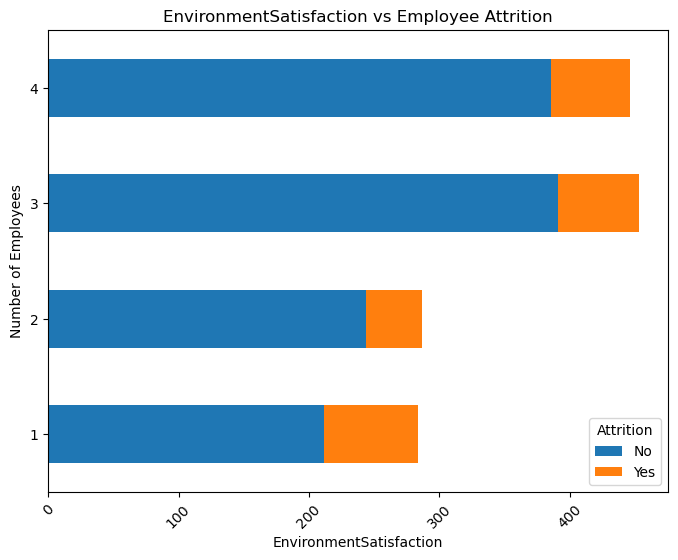

In [31]:
attrition_counts = pd.crosstab(cat_df['EnvironmentSatisfaction'], cat_df['Attrition'])
attrition_counts.plot(kind='barh', stacked=True, figsize=(8, 6))
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Number of Employees')
plt.title('EnvironmentSatisfaction vs Employee Attrition')
plt.xticks(rotation=45)  
plt.show()


<Axes: xlabel='Gender', ylabel='count'>

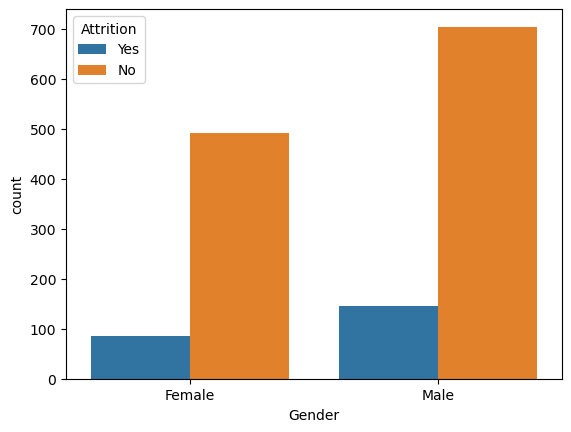

In [32]:
sb.countplot(x='Gender', hue='Attrition', data=cat_df)

<Axes: xlabel='MaritalStatus', ylabel='count'>

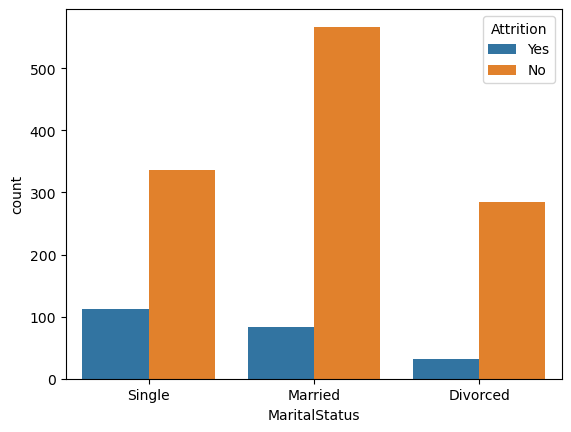

In [33]:
sb.countplot(x='MaritalStatus', hue='Attrition', data=cat_df)

([<matplotlib.patches.Wedge at 0x24a23cacbf0>,
 [Text(-0.6931655117563703, 0.8541203506014416, 'No'),
  Text(0.6931655117563698, -0.854120350601442, 'Yes')],
 [Text(-0.3780902791398383, 0.4658838276007863, '71.70%'),
  Text(0.378090279139838, -0.4658838276007865, '28.30%')])

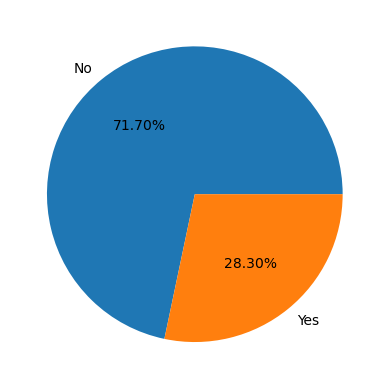

In [34]:
plt.pie(x=cat_df['OverTime'].value_counts().values,labels=cat_df['OverTime'].value_counts().index,autopct='%.2f%%')

<Axes: xlabel='PerformanceRating', ylabel='count'>

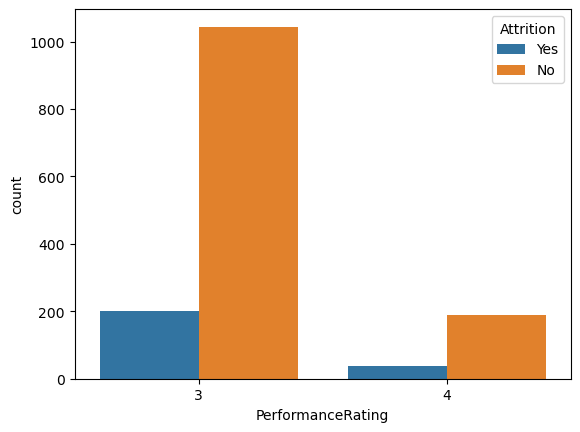

In [35]:
sb.countplot(x='PerformanceRating', hue='Attrition', data=cat_df)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

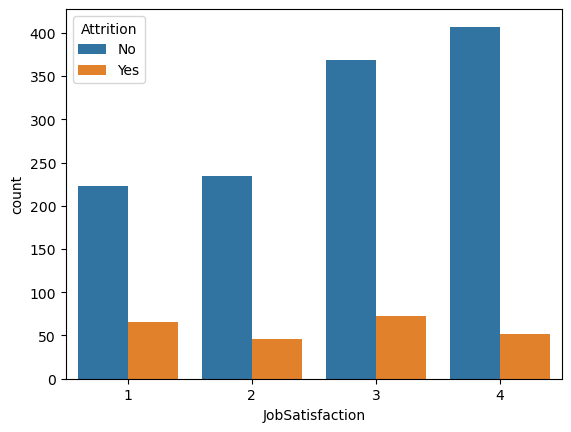

In [36]:
sb.countplot(x='JobSatisfaction', hue='Attrition', data=cat_df)

<Axes: xlabel='Age', ylabel='Attrition'>

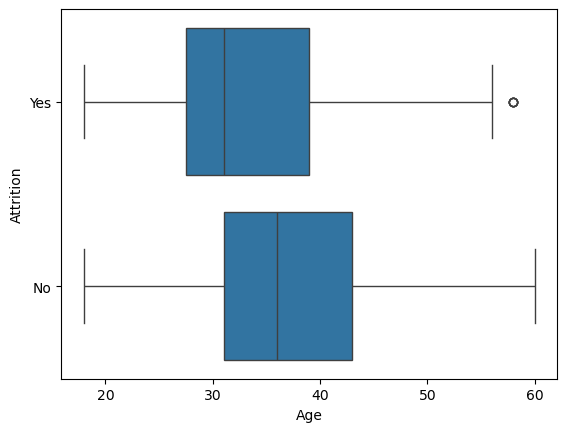

In [41]:
#TASK2
sb.boxplot(x='Age', y='Attrition', data=df)

<Axes: xlabel='Age', ylabel='Count'>

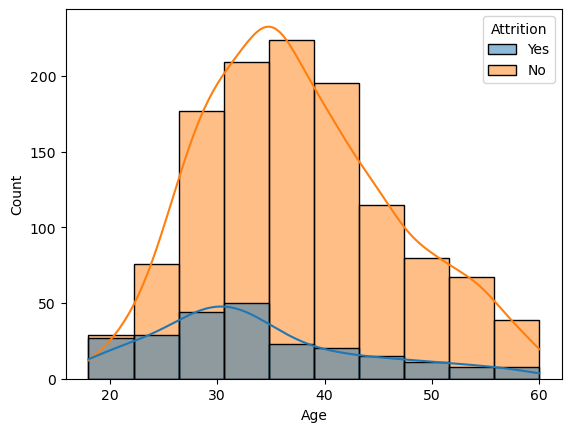

In [50]:
sb.histplot(data=df, x='Age', hue='Attrition', bins=10, kde=True)


<Axes: xlabel='HourlyRate', ylabel='Attrition'>

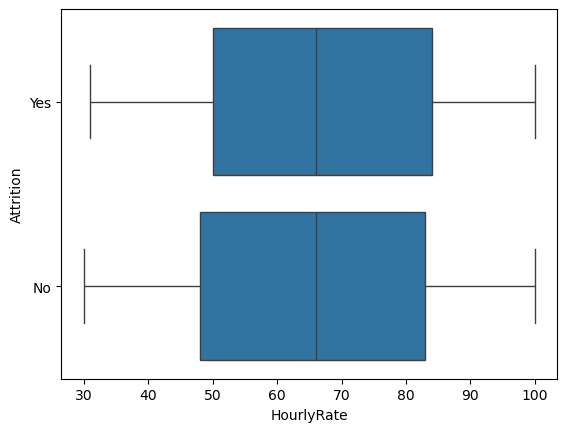

In [43]:
sb.boxplot(x='HourlyRate', y='Attrition', data=df)

<Axes: xlabel='HourlyRate', ylabel='Count'>

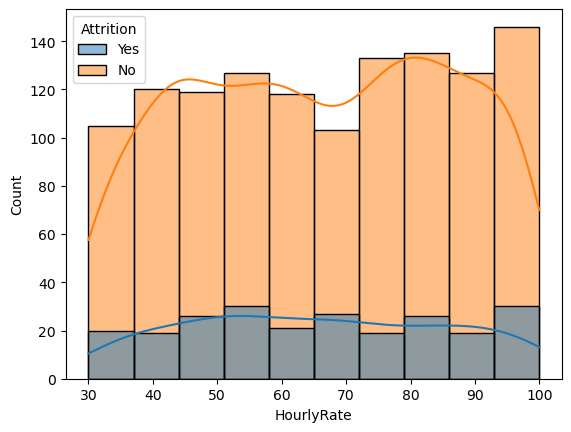

In [51]:
sb.histplot(data=df, x='HourlyRate', hue='Attrition', bins=10, kde=True)


<Axes: xlabel='MonthlyIncome', ylabel='Attrition'>

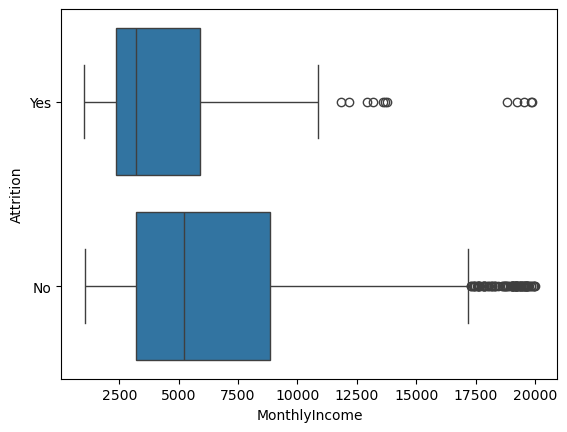

In [44]:
sb.boxplot(x='MonthlyIncome', y='Attrition', data=df)

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

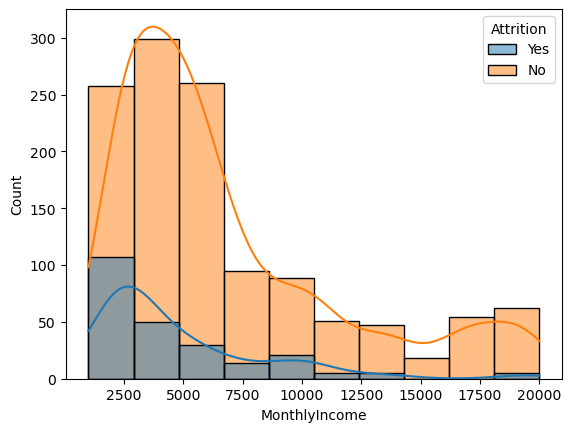

In [52]:
sb.histplot(data=df, x='MonthlyIncome', hue='Attrition', bins=10, kde=True)


<Axes: xlabel='DistanceFromHome', ylabel='Attrition'>

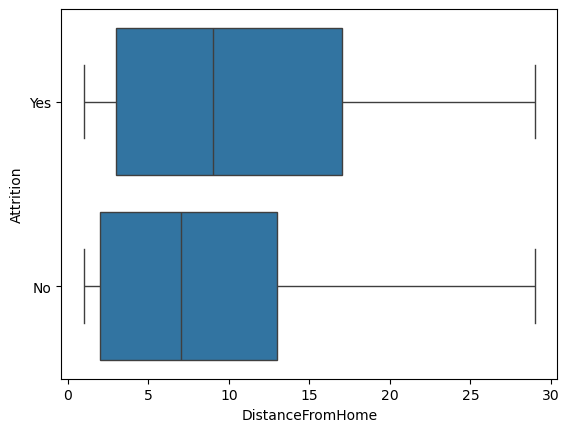

In [45]:
sb.boxplot(x='DistanceFromHome', y='Attrition', data=df)

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

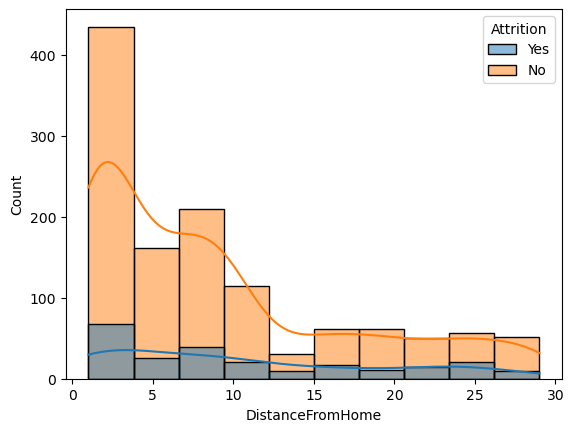

In [53]:
sb.histplot(data=df, x='DistanceFromHome', hue='Attrition', bins=10, kde=True)


<Axes: xlabel='TotalWorkingYears', ylabel='Attrition'>

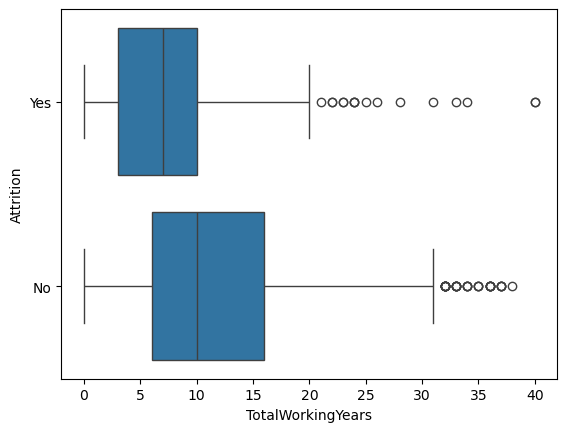

In [46]:
sb.boxplot(x='TotalWorkingYears', y='Attrition', data=df)

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

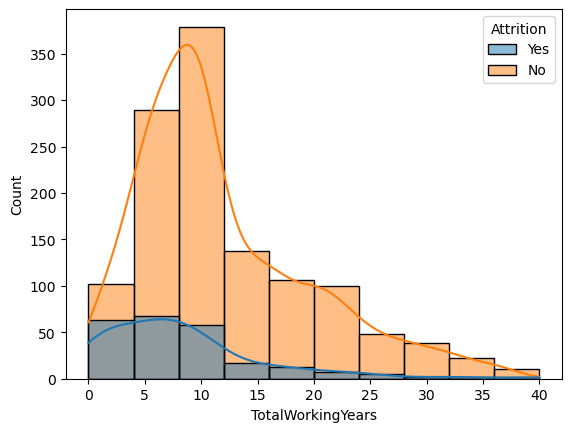

In [12]:
sb.histplot(data=df, x='TotalWorkingYears', hue='Attrition', bins=10, kde=True)


In [13]:
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

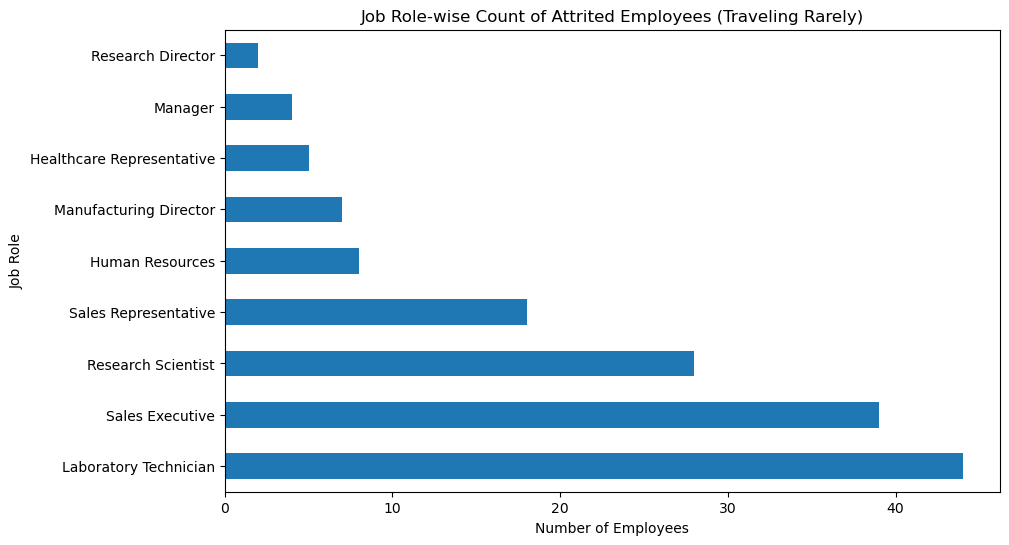

In [25]:
#TASK3
filtered_df = cat_df[(cat_df['Attrition'] == 'Yes') & (cat_df['BusinessTravel'] == 'Travel_Rarely')]
job_role_counts = filtered_df['JobRole'].value_counts()
job_role_counts.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')
plt.title('Job Role-wise Count of Attrited Employees (Traveling Rarely)')
plt.show()


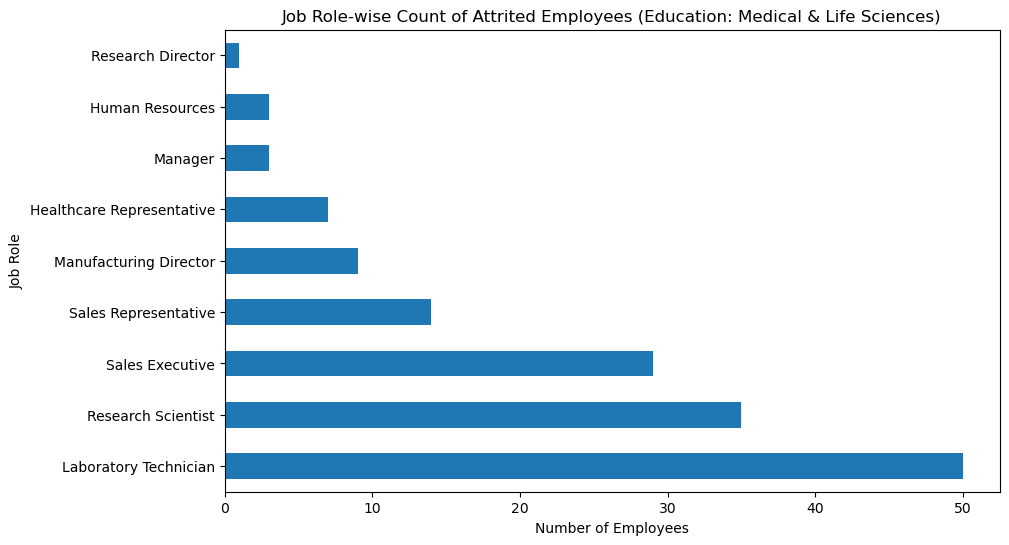

In [38]:
#TASK4
filtered_df = cat_df[
    (cat_df['Attrition'] == 'Yes') & 
    (cat_df['EducationField'].isin(['Medical', 'Life Sciences']))
]
job_role_counts = filtered_df['JobRole'].value_counts()
job_role_counts.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')
plt.title('Job Role-wise Count of Attrited Employees (Education: Medical & Life Sciences)')
plt.show()





Text(0.5, 1.0, 'Gender-wise Employee Attrition from Sales Department')

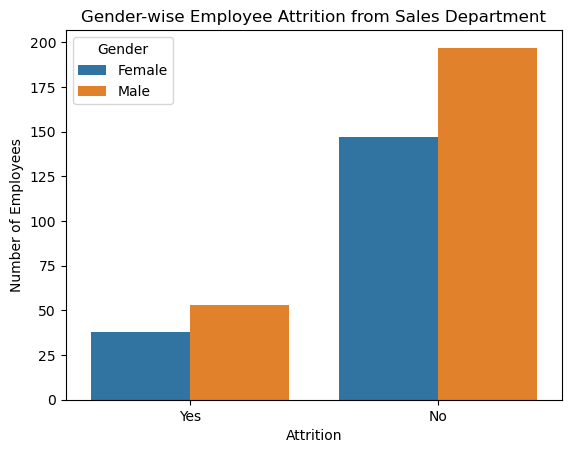

In [40]:
#TASK5
sales_df = cat_df[cat_df['Department'] == 'Sales']
sb.countplot(data=sales_df, x='Attrition', hue='Gender')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.title('Gender-wise Employee Attrition from Sales Department')
